In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from utils import *

In [3]:
trainW = WordCounter(get_tokenized_sentences('data/trainW_token_end.txt'))
trainT = WordCounter(get_tokenized_sentences('data/trainT_token_end.txt'))
test1 = WordCounter(get_tokenized_sentences('data/test1_token_end.txt'))
test2 = WordCounter(get_tokenized_sentences('data/test2_token_end.txt'))
train_easy = WordCounter(get_tokenized_sentences('data/train_easy_token_end.txt'))
test_easy = WordCounter(get_tokenized_sentences('data/test_easy_token_end.txt'))
train_debug = WordCounter(get_tokenized_sentences('data/train_debug_token_end.txt'))
test_debug = WordCounter(get_tokenized_sentences('data/test_debug_token_end.txt'))

# ngram model

### Unigram model

In [4]:
unigram_model_debug = UnigramModel(train_debug, k=1)

In [5]:
unigram_model_debug.calculate_avg_ll(test_debug)

-3.7952054459852334

In [6]:
unigram_model_trainW = UnigramModel(trainW, k=1)

for text in [trainW, trainT, test1, test2]:
    print(unigram_model_trainW.calculate_avg_ll(text))

-18.497573151470494
-18.555918913789192
-18.54761854416354
-18.54868310979827


In [7]:
unigram_model_trainT = UnigramModel(trainT, k=1)

for text in [trainW, trainT, test1, test2]:
    print(unigram_model_trainT.calculate_avg_ll(text))

-18.474849865464517
-9.321327346878743
-9.561905664153294
-10.221738332232864


Laplace smoothing as interpolation

In [8]:
ks = []
for power in range(5):
    start = 10**power
    ks.extend(list(range(start, start*10, start)))

In [9]:
test1_avg_lls = []
test2_avg_lls = []
for k in ks:
    unigram_model_trainT = UnigramModel(trainT, k=k)
    test1_avg_lls.append(unigram_model_trainT.calculate_avg_ll(test1))
    test2_avg_lls.append(unigram_model_trainT.calculate_avg_ll(test2))

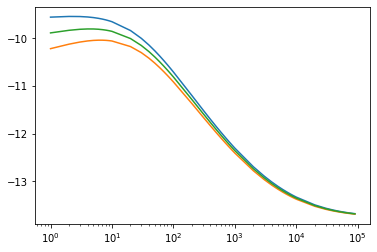

In [10]:
plt.semilogx(ks, test1_avg_lls)
plt.semilogx(ks, test2_avg_lls)
plt.semilogx(ks, (np.array(test1_avg_lls) + np.array(test2_avg_lls))/2)

### Bigram model

In [48]:
bigram_model_debug = MultigramModel(train_debug, n=3, k=1, verbose=True)

In [49]:
train_debug.token_count, bigram_model_debug.train_unigram_vocab_size, bigram_model_debug.train_prevgram_vocab_size

(27, 12, 15)

In [50]:
for prevgram, prevgram_prob in sorted(bigram_model_debug.train_startprobs.items(), key=lambda item: item[0]):
    print(prevgram, prevgram_prob)


('<PREV_UNK>',) 0.047619047619047616
('he', 'has') 0.09523809523809523
('i', 'have') 0.23809523809523808


In [51]:
for ngram, ngram_prob in sorted(bigram_model_debug.train_condprobs.items(), key=lambda item: item[0]):
    print(ngram, ngram_prob)

('<PREV_UNK>', '<UNK>') 0.07692307692307693
('a', 'cat', '<END>') 0.13333333333333333
('a', 'cat', '<UNK>') 0.06666666666666667
('a', 'cat', 'and') 0.13333333333333333
('a', 'dog', '<END>') 0.2
('a', 'dog', '<UNK>') 0.06666666666666667
('and', 'a', '<UNK>') 0.07142857142857142
('and', 'a', 'dog') 0.14285714285714285
('cat', 'and', '<UNK>') 0.07142857142857142
('cat', 'and', 'a') 0.14285714285714285
('has', 'a', '<UNK>') 0.07142857142857142
('has', 'a', 'dog') 0.14285714285714285
('have', 'a', '<UNK>') 0.06666666666666667
('have', 'a', 'cat') 0.2
('have', 'nothing', '<END>') 0.14285714285714285
('have', 'nothing', '<UNK>') 0.07142857142857142
('have', 'two', '<UNK>') 0.07142857142857142
('have', 'two', 'cats') 0.14285714285714285
('he', 'has', '<UNK>') 0.07142857142857142
('he', 'has', 'a') 0.14285714285714285
('i', 'have', '<UNK>') 0.058823529411764705
('i', 'have', 'a') 0.17647058823529413
('i', 'have', 'nothing') 0.11764705882352941
('i', 'have', 'two') 0.11764705882352941
('two', 'c

In [54]:
for ngram, ngram_count in sorted(train_debug.all_ngram_counts[3].items(), key=lambda item: item[0]):
    print(ngram, ngram_count['all'])

('a', 'cat', '<END>') 1
('a', 'cat', 'and') 1
('a', 'dog', '<END>') 2
('and', 'a', 'dog') 1
('cat', 'and', 'a') 1
('has', 'a', 'dog') 1
('have', 'a', 'cat') 2
('have', 'nothing', '<END>') 1
('have', 'two', 'cats') 1
('he', 'has', 'a') 1
('i', 'have', 'a') 2
('i', 'have', 'nothing') 1
('i', 'have', 'two') 1
('two', 'cats', '<END>') 1


In [55]:
for ngram, ngram_count in sorted(train_debug.all_ngram_counts[2].items(), key=lambda item: item[0]):
    print(ngram, ngram_count['all'])

('a', 'cat') 2
('a', 'dog') 2
('and', 'a') 1
('cat', '<END>') 1
('cat', 'and') 1
('cats', '<END>') 1
('dog', '<END>') 2
('has', 'a') 1
('have', 'a') 2
('have', 'nothing') 1
('have', 'two') 1
('he', 'has') 1
('i', 'have') 4
('nothing', '<END>') 1
('two', 'cats') 1


In [55]:
bigram_model_debug.calculate_avg_ll(test_debug)